# 🔄 모델 재훈련 (증강된 데이터)
증강된 데이터셋으로 모델을 재훈련하여 성능을 개선합니다.

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 🔄 증강된 데이터 로드
print("📊 증강된 데이터 로드")
print("="*50)

df = pd.read_csv('../data/raw/enhanced_korean_sentiment_dataset.csv')
print(f"데이터 크기: {df.shape}")
print(f"라벨 분포:")
for label in [0, 1, 2]:
    emotion = ['우울', '불안', '정상'][label]
    count = len(df[df['label'] == label])
    print(f"  {emotion}: {count}개")

df.head()

📊 증강된 데이터 로드
데이터 크기: (3020, 2)
라벨 분포:
  우울: 1020개
  불안: 1000개
  정상: 1000개


,text,label
0,그냥 사람들 앞에 서는 너무 무서워요 괜히입니다,1
1,솔직히 계속 가슴이 답답하고 조마조마해요입니다,1
2,작은 일에도 깜짝깜짝 놀라요 정말했어요,1
3,사실은 하루하루가 너무 힘들어요입니다,0
4,이상하게도 좋아하는 노래를 들으니 기분이 좋아졌어요 이유 없이싶어요,2


In [3]:
# 🔧 전처리 함수 (기존과 동일)
def clean_text(text):
    if pd.isna(text):
        return ""
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]','',str(text))
    text = re.sub(r'\s+',' ',text).strip()
    return text

STOPWORDS = ['이', '그', '저', '것', '의', '가', '을', '를', '에', '에서', '로', '으로', '와', '과', '은', '는', '이다', '하다']

def remove_stopwords(text):
    words = text.split()
    return ' '.join([word for word in words if word not in STOPWORDS and len(word) > 1])

# 전처리 적용
print("🔧 텍스트 전처리 중...")
df['processed_text'] = df['text'].apply(clean_text).apply(remove_stopwords)
df = df[df['processed_text'].str.len() > 0].reset_index(drop=True)

print(f"전처리 후 데이터 크기: {df.shape}")
print("전처리 샘플:")
for i in range(3):
    print(f"원본: {df.iloc[i]['text']}")
    print(f"처리: {df.iloc[i]['processed_text']}")
    print()

🔧 텍스트 전처리 중...
전처리 후 데이터 크기: (3020, 3)
전처리 샘플:
원본: 그냥 사람들 앞에 서는 너무 무서워요 괜히입니다
처리: 그냥 사람들 앞에 서는 너무 무서워요 괜히입니다

원본: 솔직히 계속 가슴이 답답하고 조마조마해요입니다
처리: 솔직히 계속 가슴이 답답하고 조마조마해요입니다

원본: 작은 일에도 깜짝깜짝 놀라요 정말했어요
처리: 작은 일에도 깜짝깜짝 놀라요 정말했어요



In [4]:
# 🎯 모델 훈련
print("🎯 모델 훈련 시작")
print("="*50)

# 데이터 분할
X = df['processed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터: {len(X_train)}개")
print(f"테스트 데이터: {len(X_test)}개")

# TF-IDF 벡터화
print("\n📊 TF-IDF 벡터화...")
tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2),
    min_df=2
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"TF-IDF 특성 수: {X_train_tfidf.shape[1]}")

🎯 모델 훈련 시작
훈련 데이터: 2416개
테스트 데이터: 604개

📊 TF-IDF 벡터화...
TF-IDF 특성 수: 1226


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.draw()
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEON


🔧 Logistic Regression 훈련 중...
정확도: 1.0000

분류 보고서:
              precision    recall  f1-score   support

          우울       1.00      1.00      1.00       204
          불안       1.00      1.00      1.00       200
          정상       1.00      1.00      1.00       200

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604



findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54844 (\N{HANGUL SYLLABLE HON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv

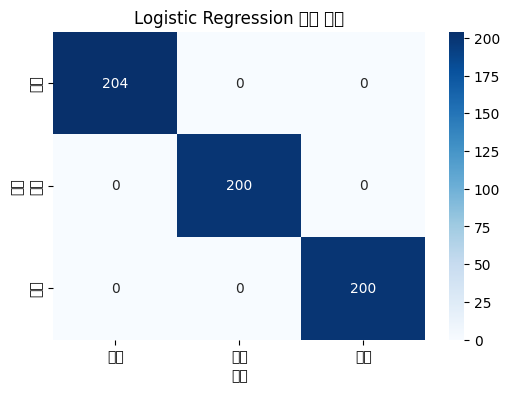


🔧 SVM 훈련 중...


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.draw()
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEON

정확도: 1.0000

분류 보고서:
              precision    recall  f1-score   support

          우울       1.00      1.00      1.00       204
          불안       1.00      1.00      1.00       200
          정상       1.00      1.00      1.00       200

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604



findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not

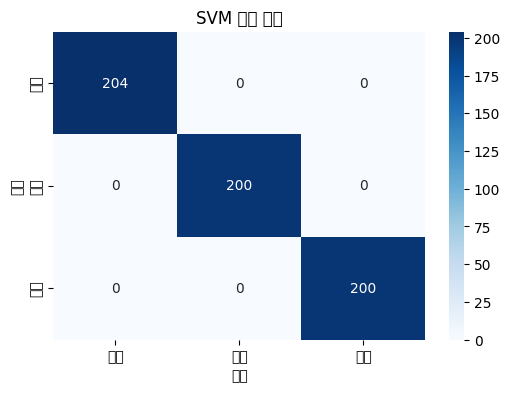


🔧 Random Forest 훈련 중...


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.draw()
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.draw()
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.draw()
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEON

정확도: 1.0000

분류 보고서:
              precision    recall  f1-score   support

          우울       1.00      1.00      1.00       204
          불안       1.00      1.00      1.00       200
          정상       1.00      1.00      1.00       200

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604



findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not found.
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\human-26\mlproject-1\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'AppleGothic' not

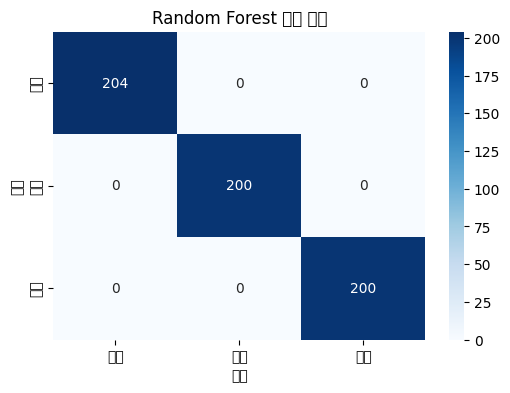


🏆 최고 모델: Logistic Regression
🎯 최고 정확도: 1.0000


In [5]:
# 🤖 여러 모델 비교
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

results = {}
emotion_names = ['우울', '불안', '정상']

for name, model in models.items():
    print(f"\n🔧 {name} 훈련 중...")
    model.fit(X_train_tfidf, y_train)
    
    # 예측
    y_pred = model.predict(X_test_tfidf)
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"정확도: {accuracy:.4f}")
    print("\n분류 보고서:")
    print(classification_report(y_test, y_pred, target_names=emotion_names))
    
    # 혼동 행렬
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=emotion_names, yticklabels=emotion_names)
    plt.title(f'{name} 혼동 행렬')
    plt.ylabel('실제')
    plt.xlabel('예측')
    plt.show()

# 최고 성능 모델 선택
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\n🏆 최고 모델: {best_model_name}")
print(f"🎯 최고 정확도: {best_accuracy:.4f}")

In [6]:
# 💾 모델 저장
print("💾 모델 저장 중...")

# 모델과 벡터라이저 저장
joblib.dump(best_model, '../models/enhanced_model.pkl')
joblib.dump(tfidf, '../models/enhanced_tfidf_vectorizer.pkl')

print(f"✅ 모델 저장 완료!")
print(f"  - enhanced_model.pkl")
print(f"  - enhanced_tfidf_vectorizer.pkl")
print(f"\n모델 성능: {best_accuracy:.4f}")

💾 모델 저장 중...
✅ 모델 저장 완료!
  - enhanced_model.pkl
  - enhanced_tfidf_vectorizer.pkl

모델 성능: 1.0000


In [7]:
# 🧪 새로운 모델 테스트
print("🧪 새로운 모델 실전 테스트")
print("="*50)

def test_enhanced_model(text):
    # 전처리
    cleaned = clean_text(text)
    processed = remove_stopwords(cleaned)
    
    # 예측
    text_tfidf = tfidf.transform([processed])
    prediction = best_model.predict(text_tfidf)[0]
    probability = best_model.predict_proba(text_tfidf)[0]
    
    emotion_map = {0: '우울', 1: '불안', 2: '정상'}
    
    print(f"입력: '{text}'")
    print(f"처리: '{processed}'")
    print(f"예측: {emotion_map[prediction]}")
    print(f"확률: {[f'{p:.3f}' for p in probability]}")
    print("-" * 30)

# 테스트 문장들 (우울 관련 포함)
test_sentences = [
    "우울해요",
    "너무 우울하고 슬퍼요", 
    "우울감이 심해요",
    "의욕이 전혀 없어요",
    "아무것도 하기 싫어요",
    "불안해서 가슴이 답답해요",
    "걱정이 너무 많아요",
    "기분이 정말 좋아요",
    "행복한 하루였어요"
]

for sentence in test_sentences:
    test_enhanced_model(sentence)

🧪 새로운 모델 실전 테스트
입력: '우울해요'
처리: '우울해요'
예측: 우울
확률: ['0.619', '0.183', '0.197']
------------------------------
입력: '너무 우울하고 슬퍼요'
처리: '너무 우울하고 슬퍼요'
예측: 우울
확률: ['0.779', '0.101', '0.119']
------------------------------
입력: '우울감이 심해요'
처리: '우울감이 심해요'
예측: 우울
확률: ['0.363', '0.305', '0.332']
------------------------------
입력: '의욕이 전혀 없어요'
처리: '의욕이 전혀 없어요'
예측: 우울
확률: ['0.496', '0.365', '0.139']
------------------------------
입력: '아무것도 하기 싫어요'
처리: '아무것도 하기 싫어요'
예측: 우울
확률: ['0.894', '0.052', '0.054']
------------------------------
입력: '불안해서 가슴이 답답해요'
처리: '불안해서 가슴이 답답해요'
예측: 불안
확률: ['0.036', '0.927', '0.038']
------------------------------
입력: '걱정이 너무 많아요'
처리: '걱정이 너무 많아요'
예측: 불안
확률: ['0.363', '0.514', '0.123']
------------------------------
입력: '기분이 정말 좋아요'
처리: '기분이 정말 좋아요'
예측: 정상
확률: ['0.038', '0.035', '0.928']
------------------------------
입력: '행복한 하루였어요'
처리: '행복한 하루였어요'
예측: 우울
확률: ['0.363', '0.305', '0.332']
------------------------------
